# Repaso de mecánica Newtoniana
[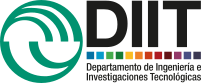](https://ingenieria.unlam.edu.ar/)    
2022 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

## Un repaso sobre vectores

\\[
\vec{r} = r \hat{r}
\\]
- El vector \\( \vec{r} \\) tiene
    - un módulo \\( r = |\vec{r}| \\),
    - y una dirección y sentido denotado por un versor \\(\hat{r}\\) 

## Operando con vectores
### Operación suma
\\[
    \vec{a}= a_i \hat{i} + a_j \hat{j}+ a_k \hat{k}
\\]
\\[
    \vec{b}= b_i \hat{i} + b_j \hat{j}+ b_k \hat{k}
\\]
\\[
    \vec{c} = \vec{a} + \vec{b} = (a_i+b_i) \hat{i} + (a_j+b_j) \hat{j}+ (a_k+b_k) \hat{k}
\\]

## Operaciones simbólicas en Python
- [Python](https://www.python.org/): lenguaje de programación
    - interpretado:
    - interactivo:
    - orientado a objetos:
- [Sympy](https://www.sympy.org/es/index.html): es una biblioteca de Python para matemática simbólica
    - Módulo [Physics: Classical Mechanics](https://docs.sympy.org/latest/modules/physics/mechanics/index.html)

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica

## Operación suma de vectores en SymPy

### Primero establecer el marco de referencia
- Los \\(\hat{i}, \hat{j}, \hat{k}\\) que utilizaremos son los del **sistema cartesiano**: \\(\hat{x}, \hat{y}, \hat{z}\\).  
    - Son lo que usa por defecto `mechanics`.

In [9]:
N = mech.ReferenceFrame('N') # sistema de referencia cartesiano fijo al suelo

### Creamos ambos vectores

In [12]:
a_x, a_y, a_z, b_x, b_y, b_z = sym.symbols('a_x, a_y, a_z, b_x, b_y, b_z')
a= a_x* N.x+ a_y* N.y+ a_z* N.z
b= b_x* N.x+ b_y* N.y+ b_z* N.z
a

### Les sumamos
\\[
    \vec{c} = \vec{a} + \vec{b} = (a_x+ b_x) \hat{x}+ (a_y+ b_y) \hat{y}+ (a_z+ b_z) \hat{z}
\\]

In [11]:
c = a + b
c

## Operando con vectores
### Operación producto

Múltiplicar por el escalar \\(m\\) el vector \\(\vec{r} = r_i \hat{i} + r_j \hat{j}+ r_k \hat{k}\\)
\\[
    m \vec{r}= m r_i \hat{i} + m r_j \hat{j}+ m r_k \hat{k}
\\]

Producto escalar: 
\\(\vec{r} \vec{s} = r s \cos(\theta) = r_i s_i+ r_j s_j + r_k s_k \\)
- así el módulo es 
    \\(r = |\vec{r}| = \sqrt{\vec{r} \vec{r}}\\)

Producto vectorial: \\(\vec{r} \times \vec{s} = 
\begin{vmatrix}
  \hat{i} & \hat{j} & \hat{k} \\
  r_i & r_j & r_k\\
  s_i & s_j & s_k
\end{vmatrix}
= (r_j s_k - r_k s_j) \hat{i} + (r_k s_i - r_i s_k) \hat{j} + (r_i s_j - r_j s_i) \hat{k} 
\\)

## Vector posición
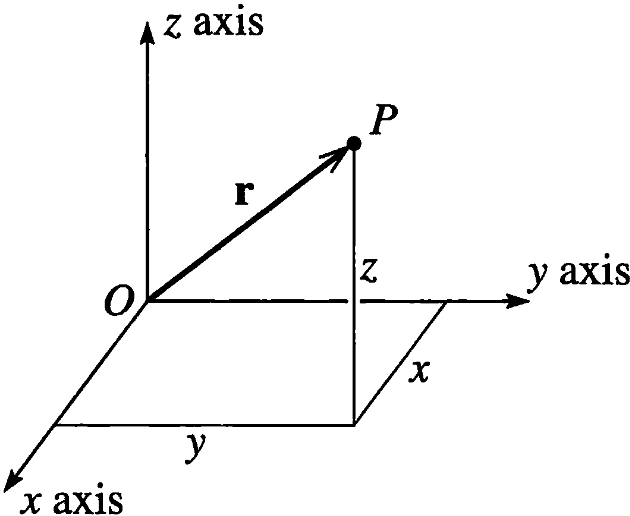

In [6]:
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

Escribir cada símbolo que se derivará como función del tiempo puede ser tedioso.
Se puede usar una función del `mechanics` para definir *símbolos dinámicos*.

## Velocidad